In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline


In [11]:
# Reading the data
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [12]:
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [13]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [14]:
# Converting TotalCharges to numeric

churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')


In [15]:
print(churnData.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [16]:
print(churnData.isnull().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [17]:
churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean(), inplace=True)

In [18]:
print(churnData.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
#Using the selected features

features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churnData[features]
y = churnData['Churn']

In [20]:
#Convert 'Churn' to binary labels (0 for 'No' and 1 for 'Yes')
y_binary = (y == 'Yes').astype(int)

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=100)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 5066 to 5640
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5634 non-null   int64  
 1   SeniorCitizen   5634 non-null   int64  
 2   MonthlyCharges  5634 non-null   float64
 3   TotalCharges    5634 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.1 KB


In [23]:
y_train

5066    0
390     0
1007    1
5087    0
2939    1
       ..
79      0
3927    1
5955    0
6936    1
5640    1
Name: Churn, Length: 5634, dtype: int64

In [24]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Initialize the logistic regression model
log_model = LogisticRegression(random_state=100)

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.794640,0.777857
1,Precision,0.657692,0.626335
2,Recall,0.460606,0.458333


In [26]:
transformed_sample = scaler.transform(X_test.sample())
log_model.predict_proba(transformed_sample)

array([[0.89196785, 0.10803215]])

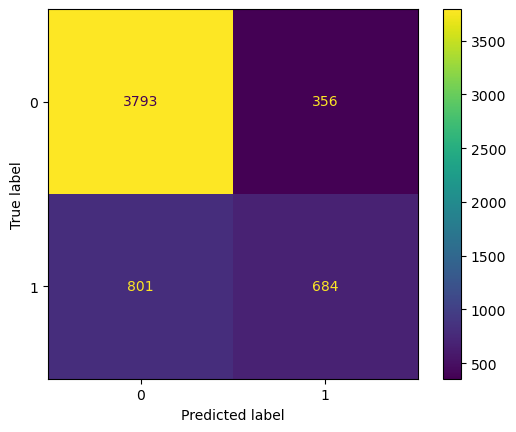

In [27]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

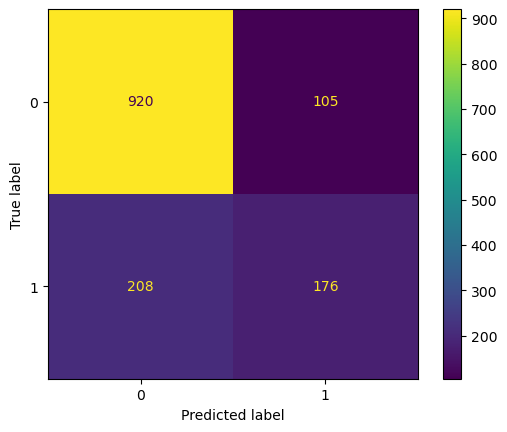

In [28]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

In [29]:
sample = pd.DataFrame(X_test_scaled).sample()

In [30]:
log_model.predict_proba(sample)

array([[0.86367156, 0.13632844]])

In [31]:
#fitting KNN classfier

model = KNeighborsClassifier(n_neighbors=25,weights='uniform')
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.801917,0.777147
1,Precision,0.702970,0.642276
2,Recall,0.430303,0.411458


In [32]:
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [33]:
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

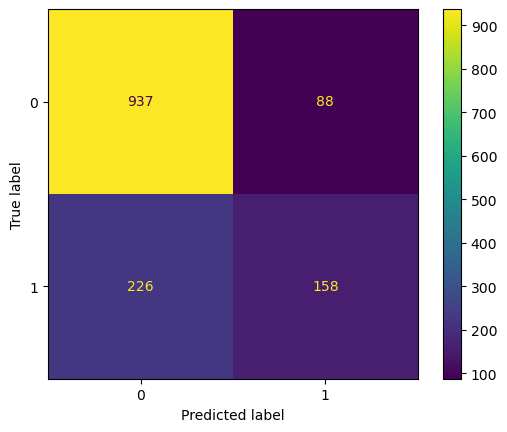

In [34]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [35]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [36]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.80,0.78
1,Precision,0.70,0.64
2,Recall,0.43,0.41


In [37]:
y_train_vs_predicted # train labels

,Real,Predicted
5066,0,0
390,0,0
1007,1,0
5087,0,0
2939,1,0
...,...,...
79,0,0
3927,1,0
5955,0,0
6936,1,1


In [38]:
y_test_vs_predicted # train labels

,Real,Predicted
4880,0,0
1541,0,0
1289,0,0
5745,0,0
4873,0,0
...,...,...
4219,0,0
3989,0,0
6668,0,0
2101,1,0


In [39]:
#decision tree


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


pos_label = 'Yes'

performance_df = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=pos_label),
                                         recall_score(y_train, y_pred_train_dt, pos_label=pos_label)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=pos_label),
                                        recall_score(y_test, y_pred_test_dt, pos_label=pos_label)]})

display(performance_df)


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


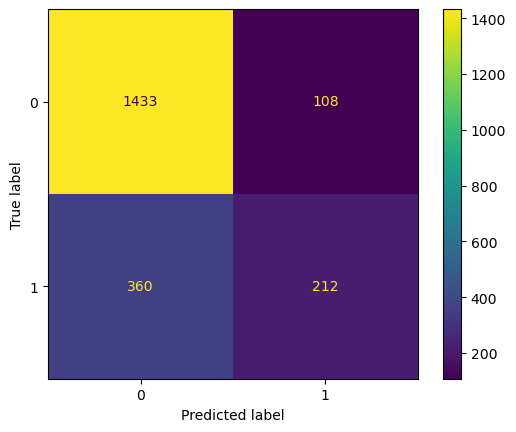

In [40]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

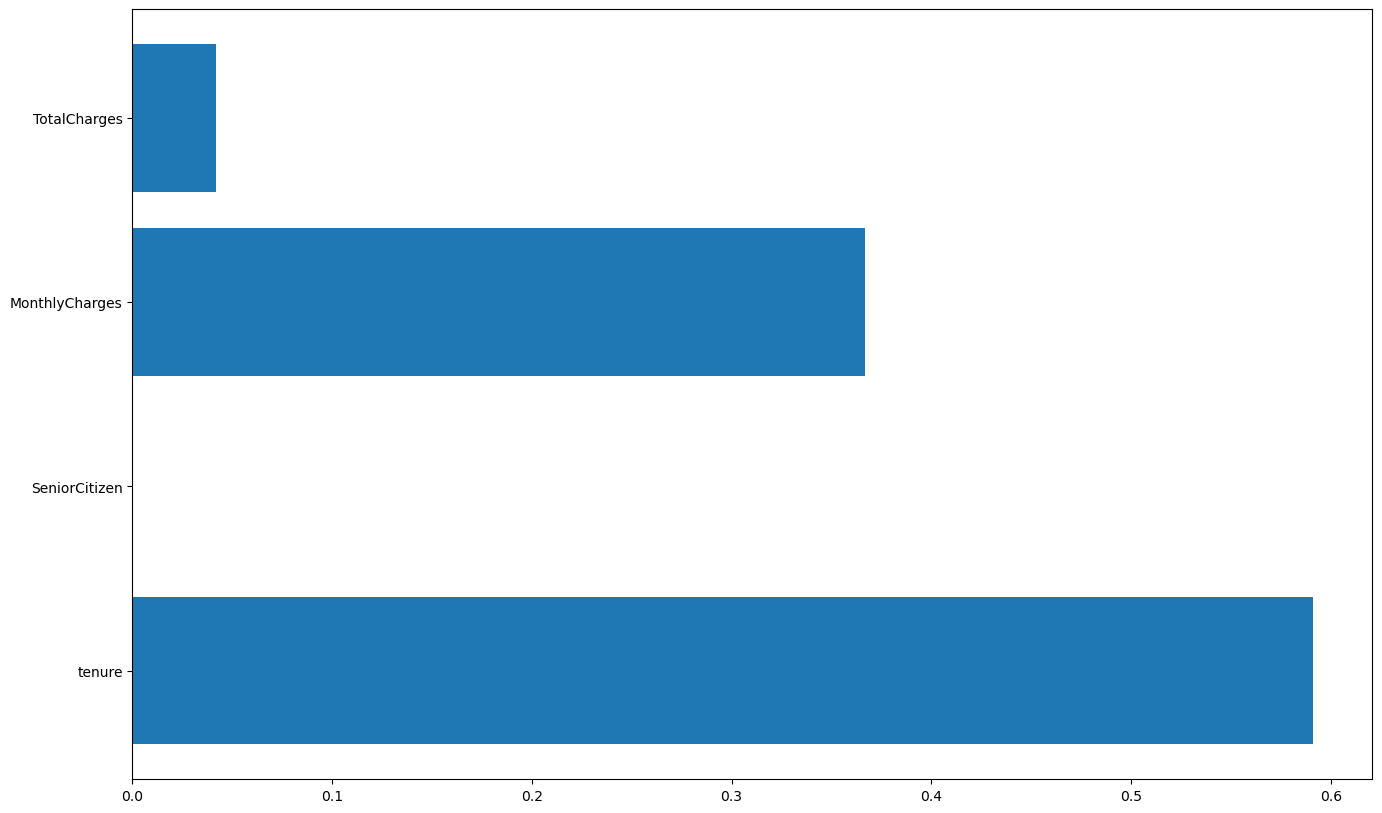

In [41]:
plt.figure(figsize=(16,10))
plt.barh(X.columns,model.feature_importances_)

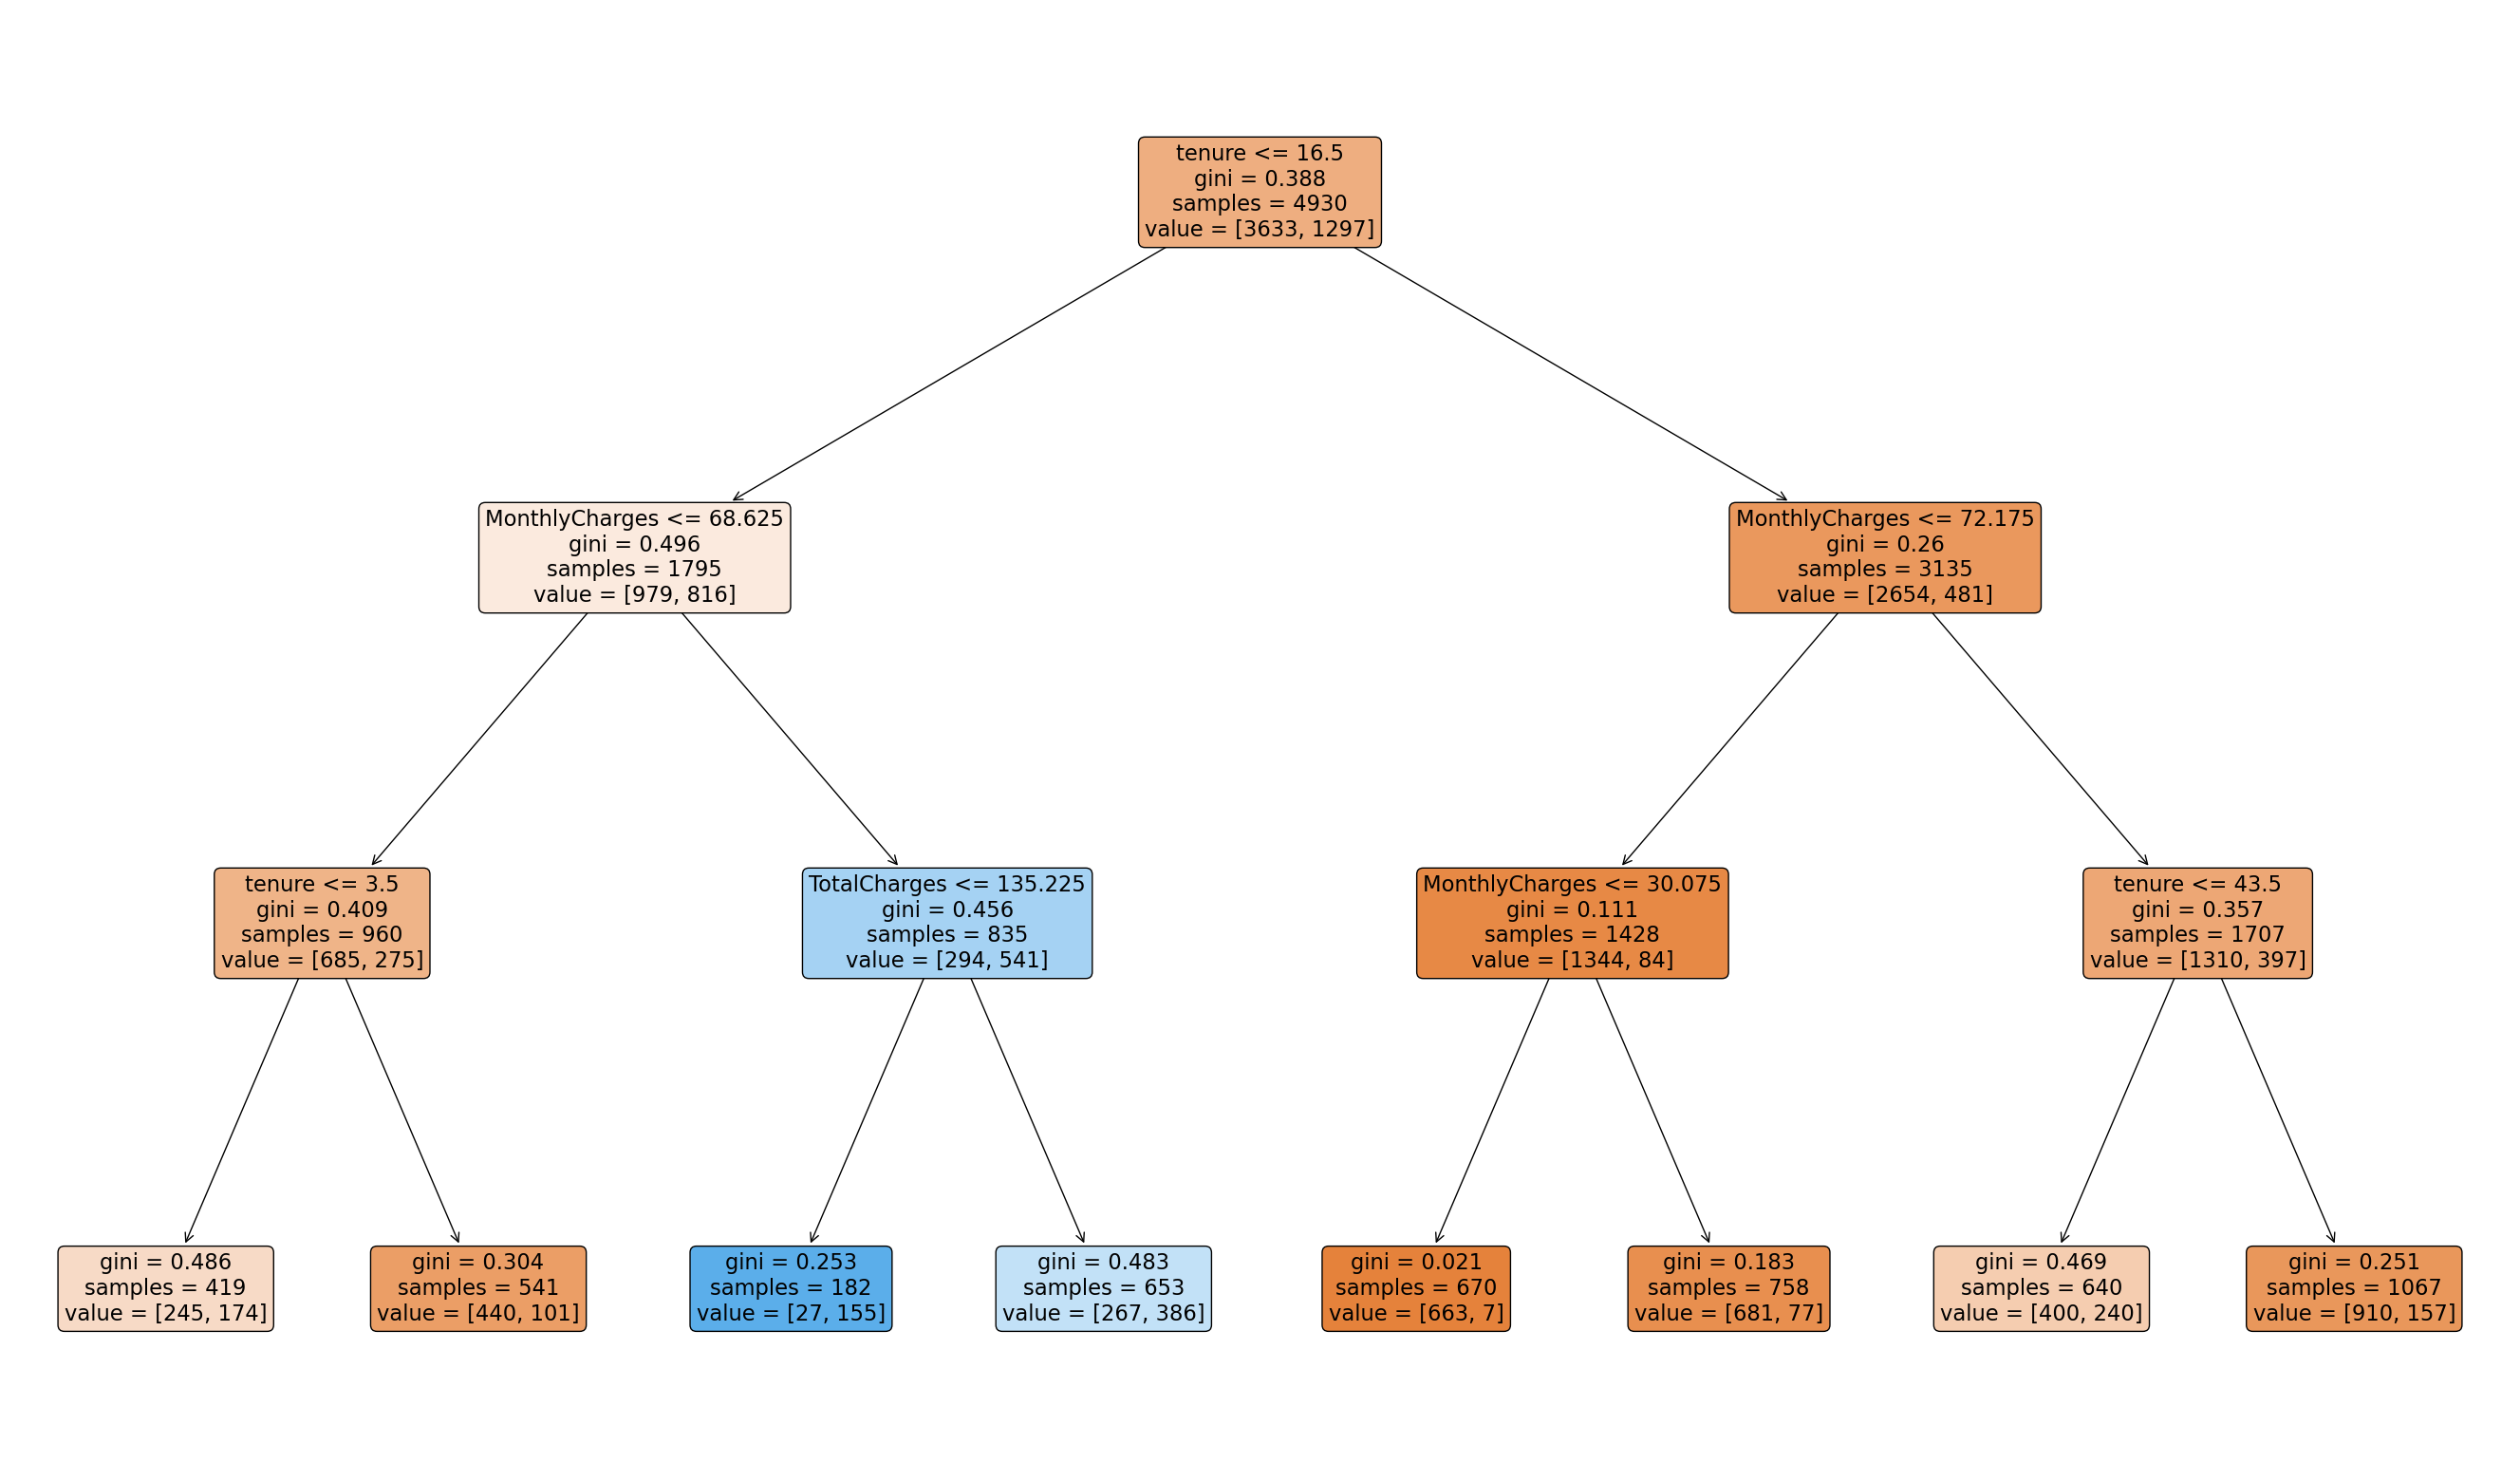

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show()

In [43]:
#checking the accuracy

from sklearn.metrics import accuracy_score

In [44]:
y_pred_test_dt = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test_dt)

print(f'Accuracy on the test data: {accuracy_test:.4f}')



Accuracy on the test data: 0.7785


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

def evaluate_decision_tree(X_train, X_test, y_train, y_test, depth_list):
    pos_label = 'Yes'

    results = []

    for depth in depth_list:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_precision = precision_score(y_train, y_pred_train, pos_label=pos_label)
        test_precision = precision_score(y_test, y_pred_test, pos_label=pos_label)

        train_recall = recall_score(y_train, y_pred_train, pos_label=pos_label)
        test_recall = recall_score(y_test, y_pred_test, pos_label=pos_label)

        results.append({
            'Depth': depth,
            'Train_Accuracy': train_accuracy,
            'Test_Accuracy': test_accuracy,
            'Train_Precision': train_precision,
            'Test_Precision': test_precision,
            'Train_Recall': train_recall,
            'Test_Recall': test_recall,
        })

    return pd.DataFrame(results)

In [46]:
depth_list = [i for i in range(1,12)]

# Evaluate the Decision Tree for each depth
results_df = evaluate_decision_tree(X_train, X_test, y_train, y_test, depth_list)

In [47]:
# Display the performance results
results_df

,Depth,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,1,0.74,0.73,0.00,0.00,0.00,0.00
1,2,0.79,0.78,0.65,0.66,0.42,0.37
2,3,0.79,0.78,0.65,0.66,0.42,0.37
3,4,0.79,0.78,0.66,0.66,0.43,0.41
4,5,0.80,0.77,0.69,0.64,0.45,0.39
5,6,0.81,0.77,0.72,0.63,0.43,0.36
6,7,0.82,0.77,0.73,0.63,0.49,0.40
7,8,0.83,0.77,0.74,0.61,0.56,0.45
8,9,0.84,0.76,0.81,0.59,0.53,0.40
9,10,0.86,0.76,0.82,0.58,0.61,0.45


In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [50]:
# Assuming churnData is your DataFrame
churnData['Churn'] = churnData['Churn'].map({'No': 0, 'Yes': 1})

In [51]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churnData[features]
y = churnData['Churn']

In [52]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [53]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [55]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

In [56]:
def evaluate_decision_tree(X_train, X_test, y_train, y_test, depth_list):
    pos_label = 1

    results = []

    for depth in depth_list:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_precision = precision_score(y_train, y_pred_train, pos_label=pos_label)
        test_precision = precision_score(y_test, y_pred_test, pos_label=pos_label)

        train_recall = recall_score(y_train, y_pred_train, pos_label=pos_label)
        test_recall = recall_score(y_test, y_pred_test, pos_label=pos_label)

        results.append({
            'Depth': depth,
            'Train_Accuracy': train_accuracy,
            'Test_Accuracy': test_accuracy,
            'Train_Precision': train_precision,
            'Test_Precision': test_precision,
            'Train_Recall': train_recall,
            'Test_Recall': test_recall,
        })

    return pd.DataFrame(results)

In [57]:
depth_list = [i for i in range(1,12)]

# Evaluate the Decision Tree for each depth
results_df = evaluate_decision_tree(X_train, X_test, y_train, y_test, depth_list)

In [58]:
results_df

,Depth,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,1,0.68,0.70,0.69,0.70,0.63,0.67
1,2,0.68,0.70,0.69,0.70,0.63,0.67
2,3,0.73,0.73,0.71,0.70,0.79,0.78
3,4,0.74,0.74,0.73,0.72,0.77,0.77
4,5,0.75,0.75,0.72,0.72,0.83,0.82
5,6,0.76,0.74,0.73,0.71,0.84,0.79
6,7,0.77,0.76,0.76,0.74,0.79,0.77
7,8,0.79,0.75,0.77,0.74,0.81,0.76
8,9,0.80,0.75,0.77,0.73,0.86,0.80
9,10,0.82,0.75,0.79,0.73,0.89,0.80


In [ ]:
#model comparison

In [59]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring = "recall"))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.739891407479404, 'Logistic Regression': 0.7757544200684995, 'KNN': 0.806062262797371}


In [60]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.74,0.78,0.81
